# Introduction  
* This dataset is a dataset for patients who might or might not have diabetes, you're task is to predict the **outcome**, whether the patient have diabetes or not.

* You are **ENCOURAGED** to copy code from the internet, use Github Co-pilot, ask chat GPT, ask me, ask other students. but don't copy the whole project, **I will know**, and you will get zero. and the person who gave it to you. As long as you prove to me that you put in the effort, I will give you full mark. 

* The outlines here are **NOT Questions**, they are designed to guide you, but you are free to remove them and deal with the data as you see. 

* The results of the model are not important, as long as show me the predictions on the test set, that you understand the code you ***supposedly*** wrote, and justify the steps you have taken, you will get full mark.

* Try to solve the bonus questions, to get a bonus.

# The Training Phase

#### Import pandas and all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#### Load the dataset, split it into 70% training set and 30% test set.
save the training set in a file called training.csv, and the test set in a file called test.csv. don't forget to shuffle the dataframe before splitting.
**Hint:** don't `use train_test_split()`, instead, use pandas `iloc[]` function.

In [2]:
data = pd.read_csv('./Diabetes dataset.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle= True)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.to_csv('training.csv', index=False)
test.to_csv('test.csv', index=False)

#### Load the file training.csv that you saved in a new data frame.

In [3]:
train = pd.read_csv('./training.csv')

#### View information about the dataset.

In [4]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    int64  
 1   Glucose                   537 non-null    int64  
 2   BloodPressure             537 non-null    int64  
 3   SkinThickness             537 non-null    int64  
 4   Insulin                   537 non-null    int64  
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    int64  
 8   Outcome                   537 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.9 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.757914,121.001862,68.951583,19.541899,77.500931,31.838920,0.468156,33.312849,0.340782
std,3.355361,31.244492,20.115002,15.958044,112.715401,7.675022,0.333139,11.967574,0.474414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,27.000000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,21.000000,0.000000,32.000000,0.355000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.400000,0.613000,41.000000,1.000000
max,15.000000,198.000000,122.000000,99.000000,744.000000,67.100000,2.329000,72.000000,1.000000


#### Clean the dataset.
drop the useless columns, deal with the null values.   
will you drop the rows, or use pandas mean(), or use sklearn simple Imputer?

In [5]:
train.drop(columns=["Pregnancies"], inplace=True, axis=1)

#### [BONUS++] Detect if there are any outliers in the dataset, if any, how will you deal with them ?

In [6]:
train['Insulin'] = np.log(train['Insulin'])
pd.set_option('mode.use_inf_as_na', True)
train.dropna(subset=['Insulin'], inplace=True)

train['Insulin']

c:\Users\eslam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      4.700480
1      4.605170
3      4.779123
5      5.736572
6      5.996452
         ...   
526    5.278115
527    4.330733
531    5.648974
532    6.086775
533    5.971262
Name: Insulin, Length: 263, dtype: float64

#### Provide at least one drawing (histogram, pie chart, etc ..) that you see fit, about the dataset.

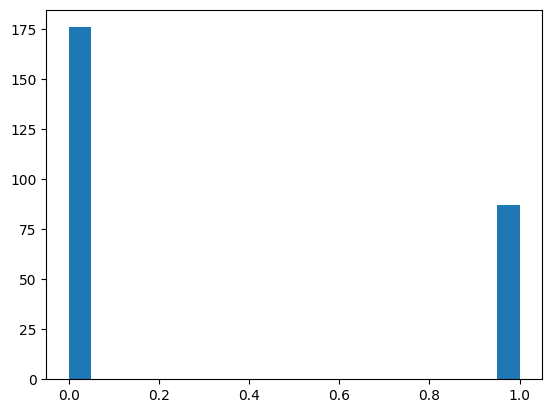

In [7]:
plt.hist(train['Outcome'], bins=20)

plt.show()

#### Draw a pie chart for the outcome label.

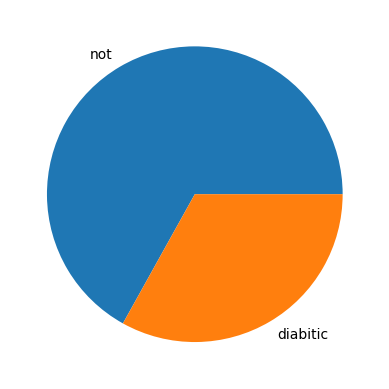

In [8]:
one = train['Outcome'].value_counts().iloc[0]
second = train['Outcome'].value_counts().iloc[1]

plt.pie((one, second), labels = ['not', 'diabitic'])
plt.show()

#### Draw a histogram to see the distribution of ages.

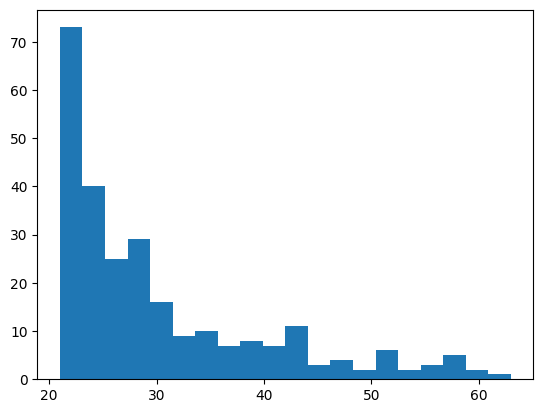

In [9]:
plt.hist(train['Age'], bins=20)

plt.show()

#### Use KBinsDiscretizer to convert age into 5 categories.

In [10]:
KBin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
age_scaled = KBin.fit_transform(train['Age'].values.reshape(-1, 1)) 
train['Age'] = age_scaled
train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,136,70,32,4.700480,37.1,0.153,2.0,1
1,97,64,36,4.605170,36.8,0.600,0.0,0
3,106,64,35,4.779123,30.5,1.400,1.0,0
5,143,84,23,5.736572,42.4,1.076,0.0,0
6,124,70,33,5.996452,35.4,0.282,1.0,0
...,...,...,...,...,...,...,...,...
526,100,66,29,5.278115,32.0,0.444,2.0,0
527,84,50,23,4.330733,30.4,0.968,0.0,0
531,154,62,31,5.648974,32.8,0.237,0.0,0
532,157,74,35,6.086775,39.4,0.134,1.0,0


#### Use Standard Scaler to scale the data.

In [11]:
sc = StandardScaler()
train.iloc[:, :-1] = sc.fit_transform(train.iloc[:, :-1])
train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.424843,-0.040270,0.335944,-0.197156,0.586553,-1.053402,1.156811,1
1,-0.792708,-0.490945,0.732592,-0.336239,0.543494,0.185260,-0.632843,0
3,-0.511735,-0.490945,0.633430,-0.082395,-0.360729,2.402105,0.261984,0
5,0.643378,1.011308,-0.556513,1.314781,1.347248,1.504283,-0.632843,0
6,0.050212,-0.040270,0.435106,1.694015,0.342556,-0.695935,0.261984,0
...,...,...,...,...,...,...,...,...
526,-0.699050,-0.340720,0.038458,0.645768,-0.145438,-0.247024,1.156811,0
527,-1.198558,-1.542523,-0.556513,-0.736717,-0.375082,1.205009,-0.632843,0
531,0.986790,-0.641171,0.236782,1.186951,-0.030616,-0.820633,-0.632843,0
532,1.080447,0.260181,0.633430,1.825820,0.916666,-1.106052,0.261984,0


#### Split the training data frame into X and y 

In [12]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

#### Train an SVM Classifier, tune it's hyperparameters use GridsearchCV.    

In [13]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                  }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)

svm_gs.fit(X, y)
y_pred = svm_gs.predict(X)

svm_winner = svm_gs.best_estimator_
train_accuracy = svm_winner.score(X, y)
train_accuracy

0.7832699619771863

#### Print the classification report for the best estimator.  

In [14]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       176
           1       0.75      0.52      0.61        87

    accuracy                           0.78       263
   macro avg       0.77      0.72      0.73       263
weighted avg       0.78      0.78      0.77       263



#### Plot the confusion matrix.  

In [15]:
print(confusion_matrix(y, y_pred))

[[161  15]
 [ 42  45]]


#### [BONUS] Try other classifiers  
try XGBoost, CatBoost, Light GBM, decision tree and plot the tree, try a library called Lazy Predict. Try some Auto ML Libraries like PyCaret.   

#### Save the model as a pkl file.


In [16]:
import pickle
pickle.dump(svm_gs, open('model.pkl', 'wb'))

#### [BONUS] SkLearn Pipelines  
If you are able to make this into a single sklearn pipeline (ColumnTransformer-> Onehotencoder -> StandardScaler-> SVM) pkl file, I will give you full mark + bonus + 10 pounds. to get the bonus I need your production code to look like this: `model = pkl.load(model) - model.predict(test set)` all in a single sklearn pipeline, no pandas no nothing.  

# The Production Phase !    

#### Load the test set, do your transformations as you did with the training set. 

In [17]:
test = pd.read_csv('./test.csv')

test.drop(columns=["Pregnancies"], inplace=True, axis=1)

In [18]:
test['Insulin'] = np.log(test['Insulin'])
test.dropna(subset=['Insulin'], inplace=True)

c:\Users\eslam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
KBin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
age_scaled = KBin.fit_transform(test['Age'].values.reshape(-1, 1)) 
test['Age'] = age_scaled

test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,136,74,26,4.905275,26.0,0.647,2.0,0
4,116,78,29,5.192957,36.1,0.496,0.0,0
7,119,54,13,3.912023,22.3,0.205,0.0,0
9,105,64,41,4.955827,41.5,0.173,0.0,0
11,95,74,21,4.290459,25.9,0.673,1.0,0
...,...,...,...,...,...,...,...,...
225,129,74,26,5.323010,33.2,0.591,0.0,0
226,91,70,32,4.477337,33.1,0.446,0.0,0
227,109,38,18,4.787492,23.1,0.407,0.0,0
228,91,54,25,4.605170,25.2,0.234,0.0,0


In [20]:
sc = StandardScaler()
test.iloc[:, :-1] = sc.fit_transform(test.iloc[:, :-1])

test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.463023,0.295466,-0.366103,0.211945,-0.907238,0.419995,1.708318,0
4,-0.204627,0.675869,-0.098173,0.611654,0.413297,-0.043876,-0.647363,0
7,-0.104480,-1.606549,-1.527133,-1.168089,-1.390998,-0.937824,-0.647363,0
9,-0.571835,-0.655542,0.973547,0.282183,1.119326,-1.036128,-0.647363,0
11,-0.905660,0.295466,-0.812653,-0.642285,-0.920312,0.499867,0.530478,0
...,...,...,...,...,...,...,...,...
225,0.229346,0.295466,-0.366103,0.792351,0.034134,0.247963,-0.647363,0
226,-1.039190,-0.084937,0.169757,-0.382636,0.021059,-0.197475,-0.647363,0
227,-0.438305,-3.128161,-1.080583,0.048297,-1.286401,-0.317283,-0.647363,0
228,-1.039190,-1.606549,-0.455413,-0.205023,-1.011835,-0.848737,-0.647363,0


#### Load the model from the pkl file, use it to predict on the test set.

In [21]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
X = test.iloc[:, :-1]
y = test.iloc[:, -1]

y_pred = pickled_model.predict(X)

pickled_winner = pickled_model.best_estimator_
test_accuracy = pickled_winner.score(X, y)
test_accuracy

0.8015267175572519

#### Print the classification report.  
reflect on the results in terms of F1 score, precision and recall. Is the model overfitting, underfitting and why?

In [22]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        88
           1       0.79      0.53      0.64        43

    accuracy                           0.80       131
   macro avg       0.80      0.73      0.75       131
weighted avg       0.80      0.80      0.79       131



#### Plot the confusion matrix, reflect on the results

In [23]:
print(confusion_matrix(y, y_pred))

[[82  6]
 [20 23]]


#### Compare the training accuracy vs test accuracy.
reflect on the results, is your model underfitting or overfitting? and why?.  
Draw a bar plot comparing the two.  

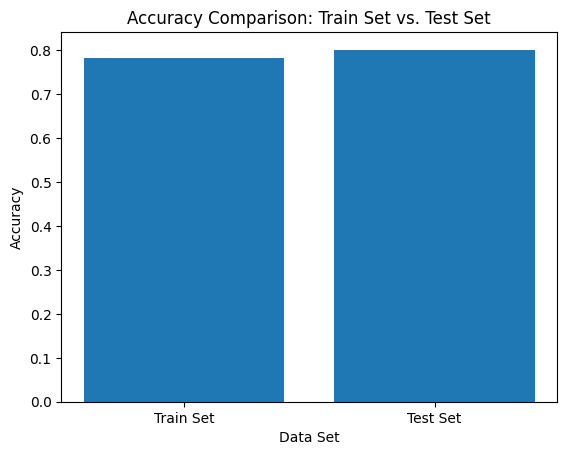

In [27]:
labels = ['Train Set', 'Test Set']
accuracy_scores = [train_accuracy, test_accuracy]

plt.bar(labels, accuracy_scores)
plt.xlabel('Data Set')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Train Set vs. Test Set')

plt.show()

#### [BONUS] Can you plot the decision boundaries for 2 features?  
Hint: steal some code form the internet, google: python plot decision boundary or ask chatGPT

#### [BONUS++++] Deployment  
Can you deploy this? use your .edu email to create a free azure for students account. think of fast API, Flask with Azure web service or just python function with Azure Functions (like AWS Lambda) call your API using Postman.  

# The End
Congratulations, you made it this far, upload the project to github, add it to your CV.